In [5]:
import numpy as np
import matplotlib.pyplot as plt
import a405thermo.rootfinder as rf

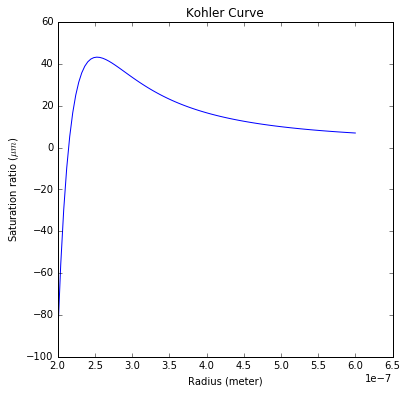

In [8]:
# plotting kohler curve
%matplotlib inline

#constant
sigma = 7.5e-2 # Nm-1
Rv =461 # J Kg-1 K-1
temp = 273.15 # K
rho_l = 1
radius = np.linspace(0.2e-6,0.6e-6,100)

a = 2 * sigma /(rho_l * Rv * temp)

n_s = 2.3e-18
n_w = (rho_l*(4/3)*np.pi*radius**3)/0.018

sat_ratio = (1 - (n_s/ n_w))*(np.exp(a/radius))

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(radius,sat_ratio)
ax.set_title('Kohler Curve')
ax.set_ylabel('Saturation ratio ($\mu m$)')
ax.set_xlabel('Radius (meter)')

In [14]:
# rootfinder 
 
def find_kohler(radius_guess, temp, rh):
    """
    input:  radius_guess, m
            rh, relative humidity
            temp, K
            
    output: rh - rh_guess        
    
    """
    sigma = 7.5e-2 # Nm-1
    Rv =461 # J Kg-1 K-1
    rho_l = 1
    ns = 2.3e-18 # mol
    a = 2 * sigma /(rho_l * Rv * temp)
    n_w = (rho_l*(4/3)*np.pi*(radius_guess**3))/0.018
    rh_guess = (1 - (n_s/ n_w))*(np.exp (a/radius_guess))
    
    return rh - rh_guess

temp = 15 + 273.15 #K
rh = 90 * 0.01

bracket = rf.find_interval(find_kohler, 0.2e-6, temp, rh)

radius_15_90 = rf.fzero(find_kohler,bracket, temp, rh)
print(radius_15_90)


2.1494165701149693e-07
